Describe lenght my project

- long, well-formatted text goes here


In [4]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Clustering and Clusters

* Clustering: Statistical or computational approach to uncover structure in a 
dataset   
* What is a cluster?
*  A “group of points that are similar” or “close to each other”
  * The notion of a “cluster” is not well defined beyond the definition above
* Clusters may be at times subjective
    * What the concept of boundary around a set of similar points is subjective
* Once we see cluster we "kind of" know what it is

### Questions

* Do close points represent clusters?
* How can you generate a graph like the one below?
  
<img src="https://www.dropbox.com/s/qh3fhjq7ojkfd7u/random_scatter.png?dl=1" alt="drawing" style="width:350px;"/>


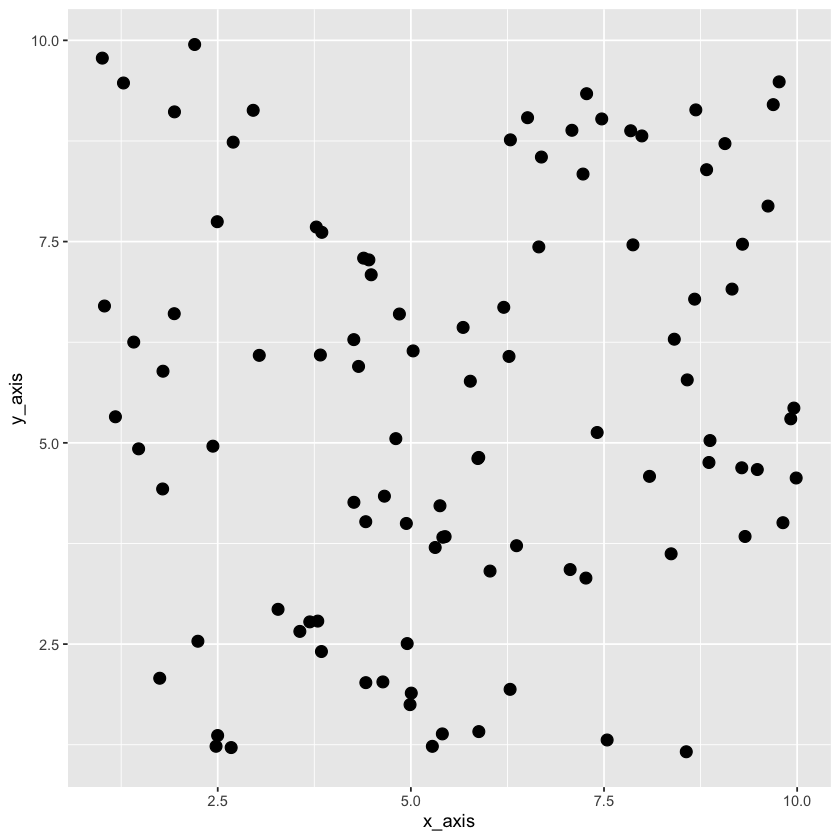

In [7]:

x_axis = runif(100, 1, 10)
y_axis = runif(100, 1, 10)

ggplot()+
  geom_point(aes(x_axis, y_axis), size=3)

### What is a Cluster? - Cont'd

- Contiguous regions of high data point density
  - Points in the region are close to each other
- Regions are separated by areas of lower point density
  - Points across regions are dissimilar
  
 <img src="https://www.dropbox.com/s/3fvdnsm1eo71oe9/two_well_defined_clusters.png?dl=1" alt="drawing" style="width:350px;"/>


In [116]:
cov_c1 = matrix(c(1,0, 0, 1), nrow=2)
cov_c1

1,0
0,1


In [32]:
library(MASS) #needed for mvnorm
mean_c1 = c(8, 12)
cov_c1 = matrix(c(1,0, 0, 1), nrow=2)
c1 = mvrnorm(n = 40, mean_c1, cov_c1)

mean_c2 = c(4, 4)
cov_c2 = matrix(c(1,0, 0, 1), nrow=2)
c2 = mvrnorm(n = 40, mean_c2, cov_c2)

In [33]:
head(c1)

8.860457,10.36001
7.111137,13.21040
8.890706,12.05078
9.251145,12.93090
9.672514,12.64259
9.079964,12.39107


In [122]:
data = as.data.frame(rbind(c1, c2))
data["cluster"] = c(rep(0, 40), rep(1,40))
head(data)


,V1,V2,cluster
,<dbl>,<dbl>,<dbl>
1,8.860457,10.36001,0
2,7.111137,13.21040,0
3,8.890706,12.05078,0
4,9.251145,12.93090,0
5,9.672514,12.64259,0
6,9.079964,12.39107,0


In [123]:

tail(data)

,V1,V2,cluster
,<dbl>,<dbl>,<dbl>
75,4.638655,3.655311,1
76,6.991188,4.031171,1
77,2.889773,3.657270,1
78,6.122799,3.631701,1
79,3.157584,3.564418,1
80,5.580125,3.099529,1


In [43]:
names(data) = c("X", "Y", "Cluster")
head(data)

,X,Y,Cluster
,<dbl>,<dbl>,<dbl>
1,8.860457,10.36001,0
2,7.111137,13.21040,0
3,8.890706,12.05078,0
4,9.251145,12.93090,0
5,9.672514,12.64259,0
6,9.079964,12.39107,0


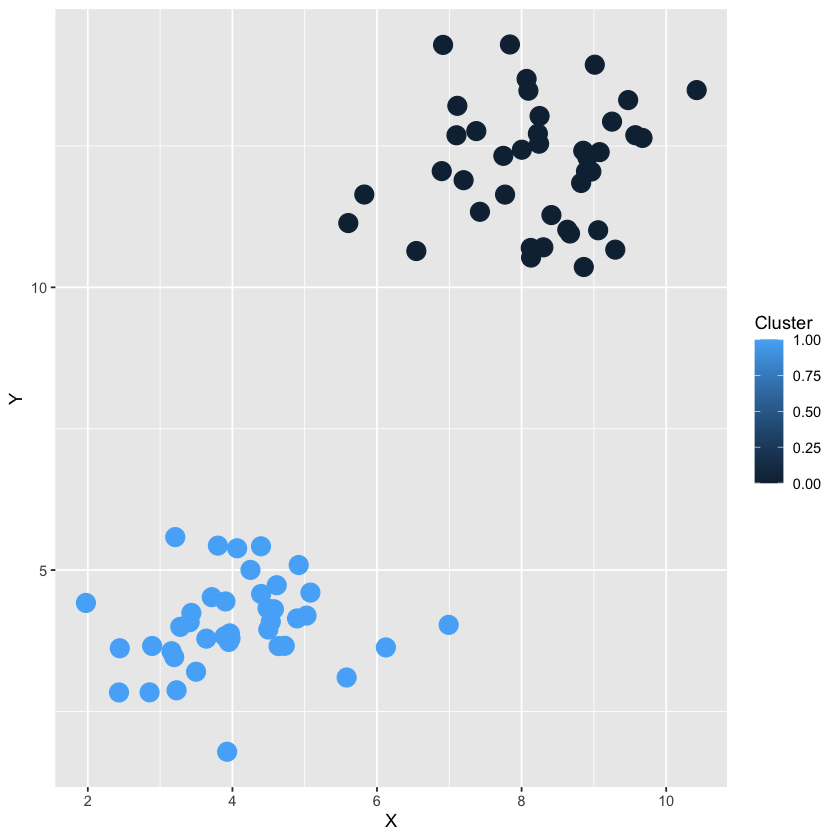

In [48]:
ggplot(data)+
  geom_point(aes(X, Y, color=Cluster), size=5)

### What is a Cluster? - Cont'd

- Contiguous regions of high data point density need not be highly dissimilar
  - On average, points across regions are dissimilar
  - Some points may be closer than others
  
 <img src="https://www.dropbox.com/s/7dad5c2ip64xw2t/two_cluster_less_well_defined.png?dl=1" alt="drawing" style="width:400px;"/>

### Data Shapes

* Clusters may have complicated shapes
  * While the clusters above appear to be well separated, real clusters can be *very* messy or have uncommon shapes
  * Some clustering methods may challenge simple approaches 

 <img src="https://www.dropbox.com/s/rj757lqb0kacmu3/data_moons.png?dl=1" alt="drawing" style="width:700px;"/>

  
  

### Applications of Clustering

* Clustering can be applied in a variety of contexts, from genetics and genomics to studying animal behavior.
* Standard definition of a cluster:
  * Regions of high-density points where points are characterized by high similarity within regions and low similarity across regions  
  * Naturally, the concept of similarity and distance between points is domain-specific
    * Similarity between two tissue samples may be the level of gene expression
      * May be complex to assess.
    * Similarity to individuals genome may be the number of SNPs between both.

### Distance and Similarity Measures 

* While data points do not have to be embedded into a geometric space, it helps to think about their distance (or similarity) as if they were.
  * If we can transform data points to have properties of a vector space then we can develop more efficient algorithms that exploit these properties.
  
* A distance is any function, `d`,  that takes two points (`x` and `y`) and returns a scalar value that is a measure of how different these points are.
  * The more dissimilar the points, the larger the distance 
  * It may be easier to make more sense to compute a similarity using a function `s`
    * s(x, y) can be easily converted into d(x,y)

### Convert Distance to Similarity

  * How can you converte a normalized distance into a similarity?
    * simimilarity is in [0,1] 
    
    
<img src="https://www.dropbox.com/s/nymvnue6eepnuon/dist_sim.png?dl=1" alt="drawing" style="width:600px;"/>

    

In [120]:
library(patchwork)

options(repr.plot.width=18, repr.plot.height=4)

x = seq(0, 1, 0.01)
y_sim = 1-x 
y_log = log(x+0.0001)
y_sqrt = sqrt(1-x)

p1 = ggplot()+
 geom_line(aes(x, y_sim))+
 ylab("1-sim")

p2 = ggplot()+
  geom_line(aes(x, y_log))+
  ylab("log(sim)")

p3 = ggplot()+
  geom_line(aes(x, y_sqrt))+
  ylab("sqrt(1-sim)")


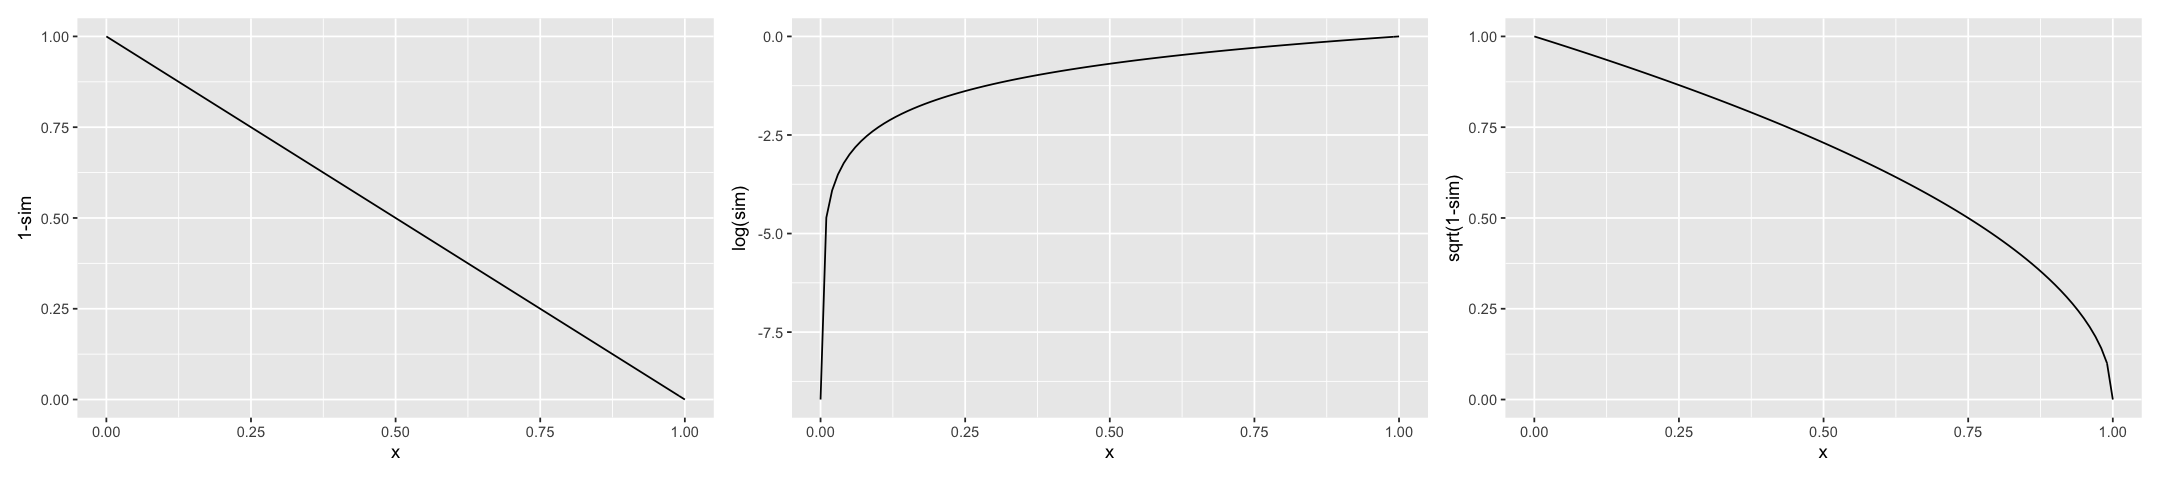

In [119]:
p1 + p2 + p3 + plot_layout(ncol = 3)


### Distance and Similarity Measures - Cont'd

* Sometimes, the concept of distance in geometric space is clear

  * Example:uUse any measure that considers the locations of the points in such a space
  * Most points are not just in 2-D but exist in higher-dimensional space
  
<img src="https://www.dropbox.com/s/b8ful4cihpe1eb7/distnace_a_b.png?dl=1" alt="drawing" style="width:500px;"/>
  
    
* In other cases, there is no obvious choice as to how to compute the distance between two points
  * Measuring the distance between two DNA strings.    

### Common Distance Metrics 

* There are two high-level categories of distances
  * Euclidean distances
    * Use the location of the points in space to estimate their distance
  * Non-euclidean distance
    * Use the properties of points to estimate their distance?

### Euclidean Distances

* Some examples
* The Euclidean distance, computed as the square root of the sum of the squares of the differences between x and y in each dimension.
  * Most common distance measure.
* The Manhattan (or taxicab) distance
* Geodesic distance

<img src="https://www.dropbox.com/s/ubyt05l0qi3bywi/manhattan_dist.png?dl=1" alt="drawing" style="width:600px;"/>

![](https://www.dropbox.com/s/lyms5e87wo1q8nb/distances.png?dl=1)



### Which Distanc is better?

[(Dis)similarity & distance](https://sites.google.com/site/mb3gustame/reference/dissimilarity)

[which-distance-to-use?!](https://stats.stackexchange.com/questions/80377/which-distance-to-use-e-g-manhattan-euclidean-bray-curtis-etc)


### Non-Euclidean Distance

Examples of non-euclidean distances are: 

* Edit distance, or number of inserts and deletes to change one string into another
  * Example, what is the distance between `x = AGACGTAG` and  `y = GTTCAGA`

<img src="https://www.dropbox.com/s/h1epcig5mfqzl31/edit_distance.png?dl=1" alt="drawing" style="width:900px;"/>

    * remove A, convert A to T, ... 
    * The distance between `x` and `y` is 5

* Jaccard distance for sets is computed as 1 minus the set of features matching between two observations over the set of all their features
  * Typically used with presence/absence kind of features

### Jaccard Distance

<img src="https://www.dropbox.com/s/fl7zpij1j88xbm1/jaccard.png?dl=1" alt="drawing" style="width:500px;"/>


### Clustering Approaches

* We will cover two approaches to clustering a set of points into  clusters

* Hierarchical 
  * Each point is a cluster
  * Repeatedly combine the two “closest” clusters into one
  * Stop when only one cluster remains
  * This is also known as "agglomerative hierarchical clustering"
  


### Clustering Approaches

* Point-to-cluster Assignment
  * Maintain a set of k clusters (ex `k = 3`)
  * Place points into “closest” cluster
    * iteratively repeat the process until the solution is stable
        
* There more advanced/complex approaches
  * Difficult to combine into categories because of the diversity of approaches and overlaps
  * Probabilistic methods increasingly popular


### Hierarchical Clustering

<img src="https://www.dropbox.com/s/q0w6tg6fa5a4q7k/hierarchical_clustering.png?dl=1" alt="drawing" style="width:600px;"/>



### Hierarchical Clustering Dendogram Representation

<img src="https://www.dropbox.com/s/gyelsurawgakx9e/hierarchical_clustering_dendo.png?dl=1" alt="drawing" style="width:700px;"/>



### Hierarchical Clustering - Cont'd

* Repeatedly combine the two “closest” clusters into one

* How do you know which pair of clusters is the closest
  * We can only compute our distances between two points

* Solution: We can represent the location of each cluster using a single measure:
  Ex. centroid, or the average of all points in a cluster

* Take all centroids and find the closest pair


### Exmaple:

![](https://www.dropbox.com/s/j9wjafwym6s56bl/hierarchical_clust_example.png?dl=1)

* (A) Heatmap for top DEGs (FDR = 0.01). 
  * Rows are genes, columns are samples ordered as in the bottom panel: ahead-of-lesion (AL), healthy (H), and diseased (D). 
 * The color scale is in log2 (fold change relative to the gene’s mean).
 * The tree is a hierarchical clustering of genes based on Pearson’s correlation of their expression across samples.


### Question

* How do you compute the centroid for the DNA sequences from before?

* Does the centroid approach work for all type of data?


### Hierarchical Clustering with Non Eclidean Distances

* There is no “average” of two points

* We can compute the distance between two clusters using other approaches. For example:
    
  * Minimum of the distances between any two points one from each cluster
    * Minimum Linkage
  * Maximum of the distances between any two points one from each cluster
    * Maximum Linkage
  * Average of the distances between any two points one from each cluster
    * Average Linkage

* Pick a notion of “cohesion” of clusters, e.g., the maximum distance from the clustroid 
  * A clusteroid is simply the center of the cluster based on, for example, the average of intra-cluster distances



### Hierarchical Clustering Results

* Easy to understand and interpret (plus)

* Provides a tree structure, not clusters and extracting clusters can be tricky! (minus)
 * Data points are leaves 
 * distance in the tree between the leaves is representative of the distance between the data points
 
* Relationship between clusters is well described (plus)




In [ ]:
d = dist(fish_survery, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )

# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1)

### Examples - https://uc-r.github.io/hc_clustering
![](https://www.dropbox.com/s/1jt5fjwf9umngqa/city_clusters.png?dl=1)



### Examples - Cont'd

![](https://www.dropbox.com/s/i8j9bq9ye8oo223/entanglement.png?dl=1)


The quality of the alignment of the two trees can be measured using the function entanglement.

```entanglement(dend_list)```

* measure between 1 (full entanglement) and 0 (no entanglement). 

* A lower entanglement coefficient corresponds to a good alignment.

```
dend_list <- dendlist(dend1, dend2)

tanglegram(dend1, dend2,
  highlight_distinct_edges = FALSE, # Turn-off dashed lines
  common_subtrees_color_lines = FALSE, # Turn-off line colors
  common_subtrees_color_branches = TRUE, # Color common branches 
  main = paste("entanglement =", round(entanglement(dend_list), 2))
  )
  
```  

## Second Category: Assigning Points to Clusters

* A popular clustering algorithm

* Two steps
  * Initializing cluster representatives
  * Assignment of points to each cluster
  * Recalculating the centroids



### Kmeans Clustering Steps

* Assumes Euclidean space
  * Cannot handle categorical data

<img src="https://www.dropbox.com/s/hk3isdbq17gg09k/kmeans_a.png?dl=1" alt="drawing" style="width:300px;"/>



### k-Means Clustering: Initialization

* Initialize clusters by `k` points; one per cluster
  * Those are the cluster representatives
  * For instance, point in space at random
  
<img src="https://www.dropbox.com/s/xqragqmmscx5rhj/kmeans_b.png?dl=1" alt="drawing" style="width:300px;"/>

### k-Means Clustering: Assign points to clusters

* Place each point in the cluster identified with the closest centroid

  * Here, we "paint" the examples the same color as the cluster centroid to which it was assigned
  
<img src="https://www.dropbox.com/s/gsr1x2uqb1q7ygg/kmeans_c.png?dl=1" alt="drawing" style="width:300px;"/>




### k-Means Clustering: Recalculating the centroids

* After all points are assigned, recompute the centroids of the $k$ clusters

<img src="https://www.dropbox.com/s/vxnc32viyh94din/kmeans_d.png?dl=1" alt="drawing" style="width:300px;"/>


### k-Means Clustering: Assign and Recalculate Centroids 

* Repeat these two steps until convergence
  * The clustering is stable and nothing changes.



### K-means Clustering Results

* Algorithm is non-nondeterministic (minus)
  * A different choice of starting values may result in a different assignment of points to clusters
    * Customary to run the k-means algorithm several times and compare results or compute a consensus
* Cannot be used with categorical data (non-Euclidean space) (minus)
  * Difficult, or sometimes impossible, to construc centroids from categorical data
  
* Can use k-medoid, the smallest average distance to all other points in the cluster (plus)
  * Less affected by outlier points 
  * More stable


### K-means Clustering Results - Cont'd


* Can take a long time to converge if initialization (minus)  
  * Very rare, but a possibility, nevertheless 

* Computationally efficient $O(k \cdot n)$ (plus)
  * linear in the number of points!
  * Small number of iterations to converge (10–50 iterations are typical)

* Works relatively well in real life.

In [3]:
something <- data.frame(X=c(1,2,3,4), Y=c(1,2,3,4), z=c("YES", "NO", "HELLO", "BYE"))
something[c(1,2)]

X,Y
<dbl>,<dbl>
1,1
2,2
3,3
4,4


In [79]:
library("cluster")
k2 = kmeans(data[c(1,2)], centers = 2, nstart = 25)
k2

K-means clustering with 2 clusters of sizes 40, 40

Cluster means:
         X         Y
1 4.038525  4.036264
2 8.216061 12.176913

Clustering vector:
 [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[77] 1 1 1 1

Within cluster sum of squares by cluster:
[1] 62.85717 87.86441
 (between_SS / total_SS =  91.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [81]:
k2$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[77] 1 1 1 1

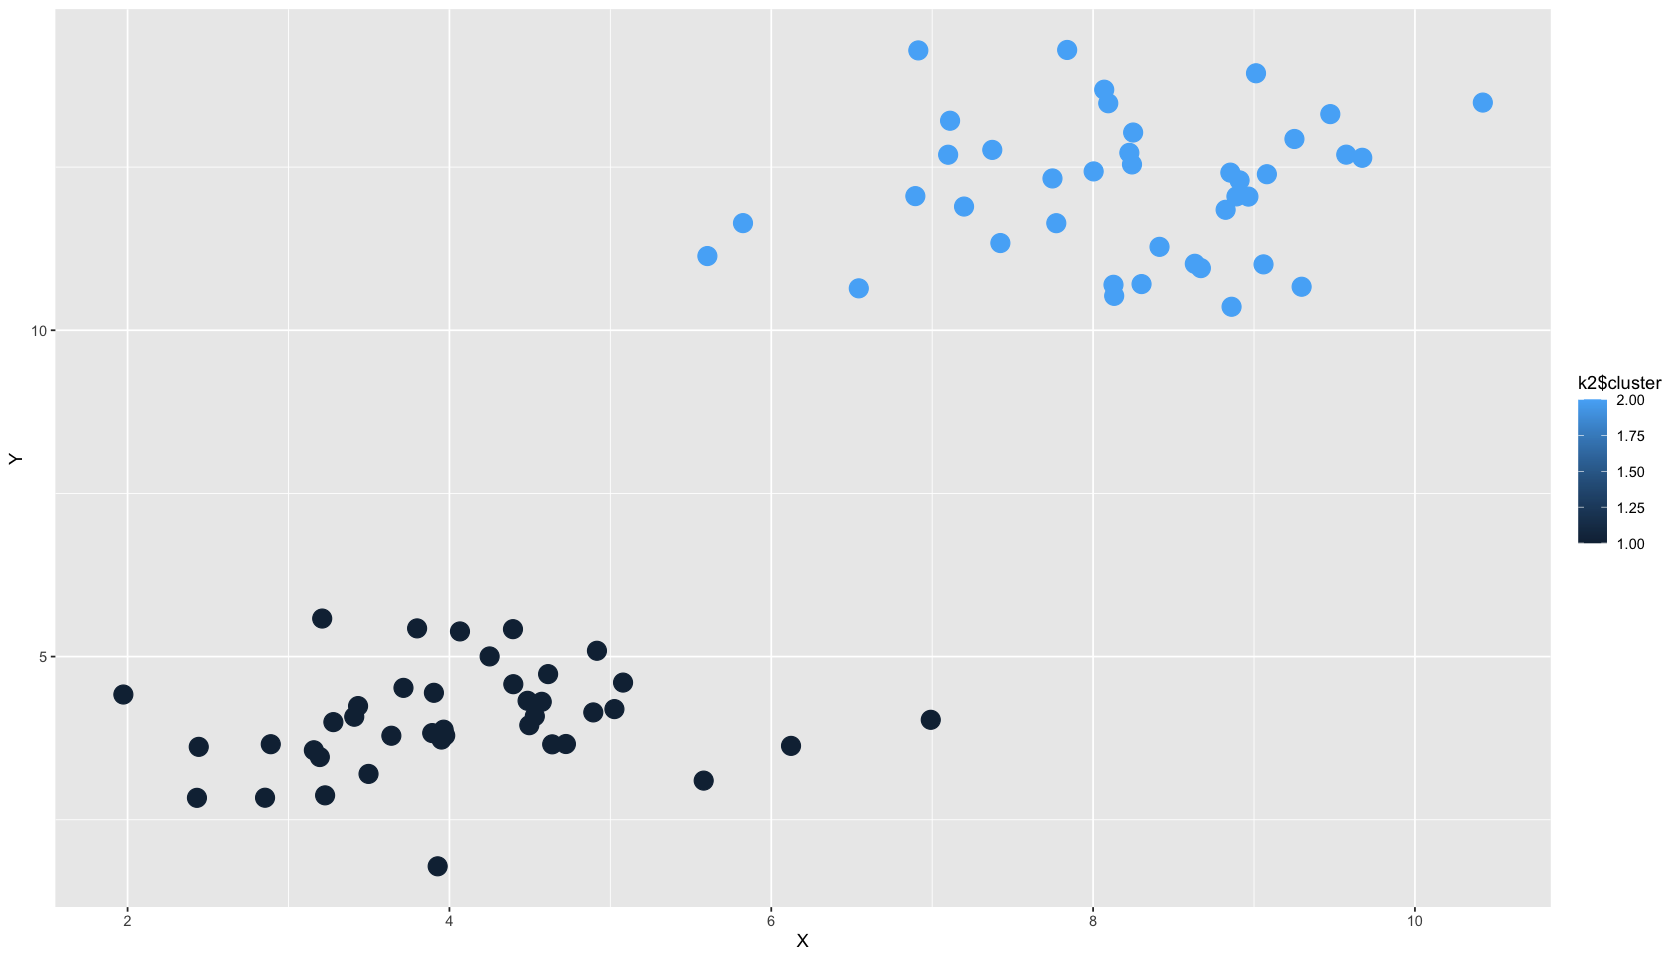

In [82]:
ggplot(data)+
  geom_point(aes(X, Y, color=k2$cluster), size=5)

### How Do We compute the Results of Clustering

* What distinguishes a good clustering from a bad one?
* Recall that what we want is:

  1. Points within the same cluster to be very similar; this is called *cohesion*
  2. Points across clusters to be highly dissimilar; this is called *separation*
  
* A clustering solution is 

$$
    \frac{separation}{cohesion}
$$ 

* Large values are indicative of a good separation


### The Silhouette Coefficient

* A good "score" to estimate the ratio of separation to cohesion

* For each cluster we denote:
  * $a_i$ is the average distance that point $i$ has from all points in same cluster
    * Represents the cohesion; we want it o be as small as possible   
  * $b_i$ be the smallest distance between point $i$ and a point not in the same cluster as $i$
    * Represents separation we want it to be as large as possible 
    


### The Silhouette Coefficient - Cont'd

* We measure the Silhouette Coefficient of a point $i$ as 

$$
S_i = \frac{b_i - a_i}{m(a_i, b_i)}
$$

* Silhouette coefficient ranges from −1 to 1
  * Negative values indicate $a_i$ is larger than b_i
    * Low cohesion or small separation or both
    * This suggests poor clustering
  * Positive values indicate $b_i$ is larger than $a_i$
    * high cohesion or high separation or both
    


### Computing Cluster-Wide Silhouette Coefficient

* Average silhouette coefficients within cluster 
  * A good indicator of the quality of the entire cluster
  * Same observations as before; large values denote good separation


<img src="https://www.dropbox.com/s/xwgmto5nm9wlhye/silhouette_dit_points.png?dl=1" alt="drawing" style="width:350px;"/>


<img src="https://www.dropbox.com/s/27upi6k3gi935lh/dist_other_clust.png?dl=1" alt="drawing" style="width:350px;"/>

<img src="https://www.dropbox.com/s/mkf3bd1m154632b/dist_across.png?dl=1" alt="drawing" style="width350px;"/>


### Computig Cluster-Wide Silhouette Coefficient

* Average over the silhouette coefficients for all data points

  * Provides a good estimator of the quality of the overall clustering
 

![](https://www.dropbox.com/s/v9yy4nrgs81d0m6/marine_clusters.png?dl=1)
https://esj-journals.onlinelibrary.wiley.com/doi/10.1111/1440-1703.12060

### Question

* Which of the following has a better Silhouette Coefficient?

  * What does it  mean to have a *better* Silhouette Coefficient
        
<img src="https://www.dropbox.com/s/egku1dcn406fnca/conf_index.png?dl=1" alt="drawing" style="width:350px;"/>

    

### Using Silhouettes to Decide on Best Number of Cluster 

* Silhouette coefficient can be useful to determine the number of clusters present in the dataset


* Run the algorithm several times for each possible value of $k$ and compute the overall silhouette coefficient each time

  * We should observe a peak at the best value of $k

* Approach: 
  * Run $k$-Means algorithm $m$ times for each value of $k$
  * Take the average of top $m-\alpha$ for each run
  * Select k with the average value $k$


In [94]:
library(factoextra)
sil_score = silhouette(k2$cluster, dist(data[c(1,2)]))


In [95]:
mean(sil_score[, 3])

[1] 0.8098247

In [101]:
get_avg_sil = function(k) {
  kmean_res = kmeans(data, centers = k, nstart = 4)
  sil_score = silhouette(kmean_res$cluster, dist(data))
  mean(sil_score[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k_vals = 2:15

# extract avg silhouette for 2-15 clusters
avg_sil_values = map_dbl(k_vals, get_avg_sil)
str(avg_sil_values)



 num [1:14] 0.811 0.589 0.35 0.376 0.385 ...


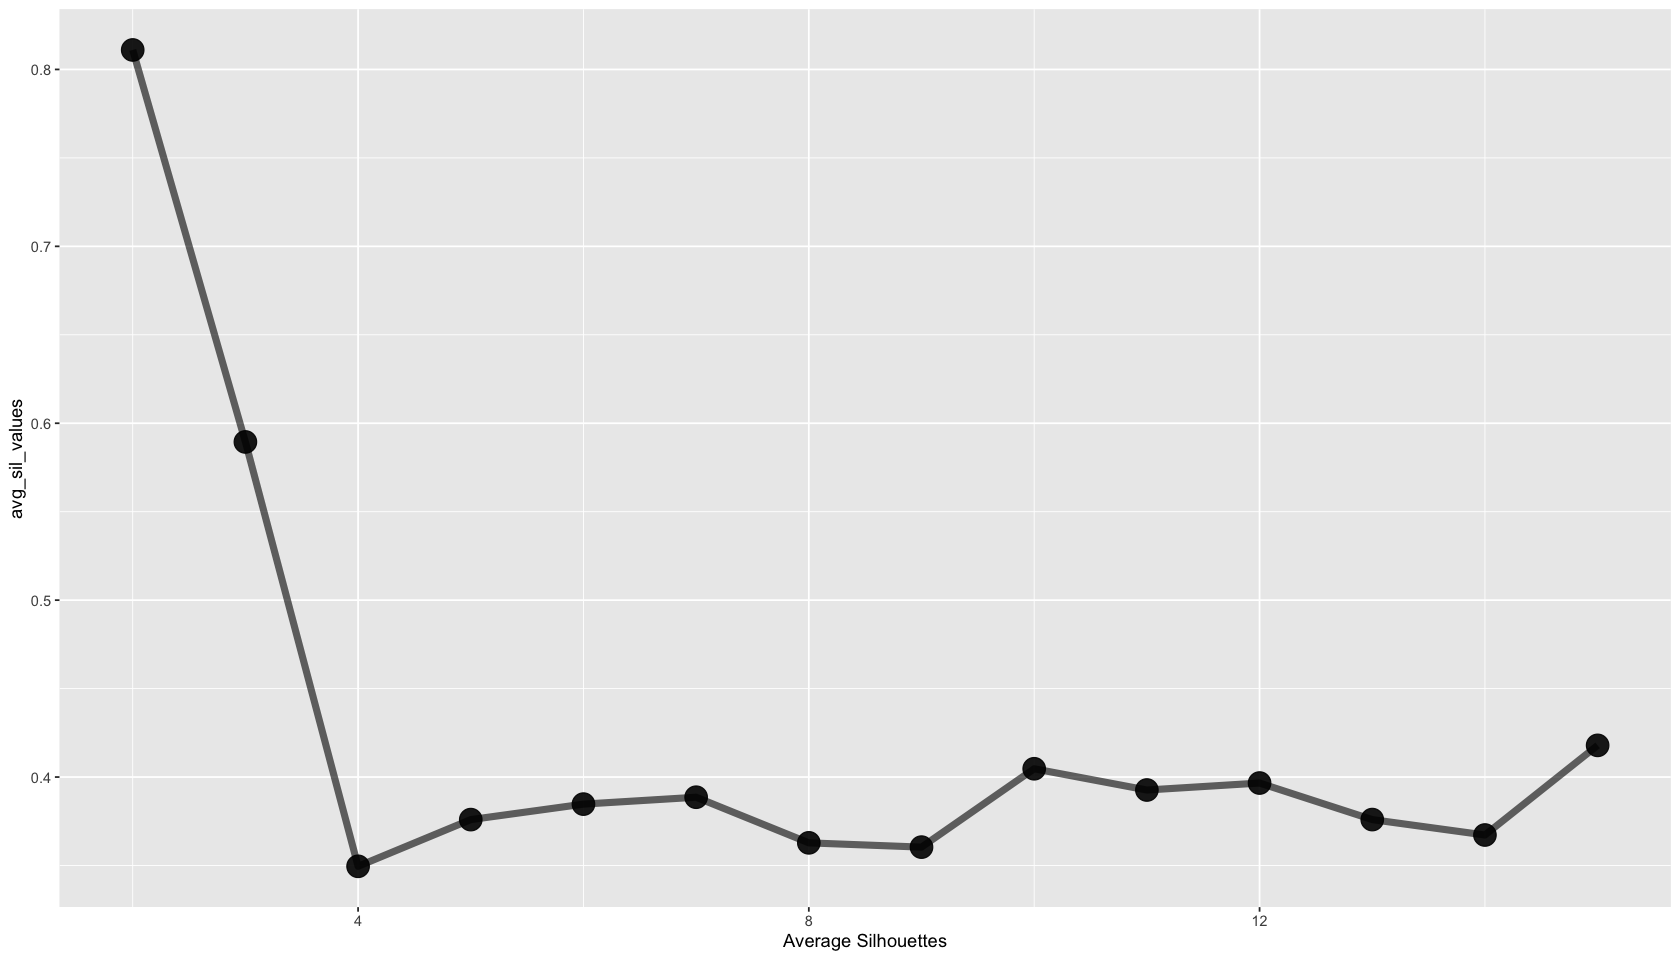

In [115]:
ggplot()+
  geom_point(aes(k_vals, avg_sil_values), size = 6, alpha=0.9)+ 
  geom_line(aes(k_vals, avg_sil_values), size=2, alpha=0.6) +
  xlab("Number of clusters K")+
  xlab("Average Silhouettes")


In [ ]:
jupyter nbconvert my_notebook.ipynb --to slides --post serve